# Exercise 08.01

## Problem:

**[Purpose: Run the high level scripts with other data to see how easy they are.]**

Consider the high-level script, `Jags-Ydich-XnomSsubj-MbernBeta-Example.R`. For this exercise, you will use that script with a new data file, and notice that you only need to change a single line, namely the one that loads the data file.

In RStudio, open a new blank file by selecting the menu items File → New → Text file. Manually type in new fictional data in the same format as the data shown in Section 8.4, p. 208, but with three subjects instead of two. Use whatever names you fancy, and as many trials for each subject as you fancy. Perhaps put a preponderance of 0’s for one subject and a preponderance of 1’s for another subject. Use a lot of trials of one subject, and relatively few trials for another. Save the file with a filename that ends with “.csv.” Then, in the script, use that file name in the read.csv command. In your report, include the data file and the graphical output of the analysis. Are the estimates reasonable? What is the effect of different sample sizes for the estimates of different subjects?

## Solution:

First, source the utilities:

In [1]:
source("../DBDA2Eprograms/DBDA2E-utilities.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



Loading required package: coda
Linked to JAGS 4.1.0
Loaded modules: basemod,bugs


The following code comes from the `Jags-Ydich-XnomSsubj-MbernBeta-Example.R` file:

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 55
   Unobserved stochastic nodes: 3
   Total graph size: 121

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                       Mean    Median      Mode     ESS HDImass      HDIlow
theta[1]          0.6498945 0.6550514 0.6694845 50000.0    0.95  0.44267050
theta[2]          0.5294860 0.5312166 0.5363473 49931.7    0.95  0.30125210
theta[3]          0.3335143 0.3296122 0.3228142 49161.5    0.95  0.17591197
theta[1]-theta[2] 0.1204085 0.1207921 0.1102379 50000.0    0.95 -0.18080323
theta[1]-theta[3] 0.3163803 0.3212276 0.3345023 50000.0    0.95  0.05276428
theta[2]-theta[3] 0.1959717 0.1983994 0.2081578 49299.1    0.95 -0.09143672
                    HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh PcntLtROPE
theta[1]          0.8425408      NA            NA      NA       NA         NA
theta[2]          0.7549709      NA           

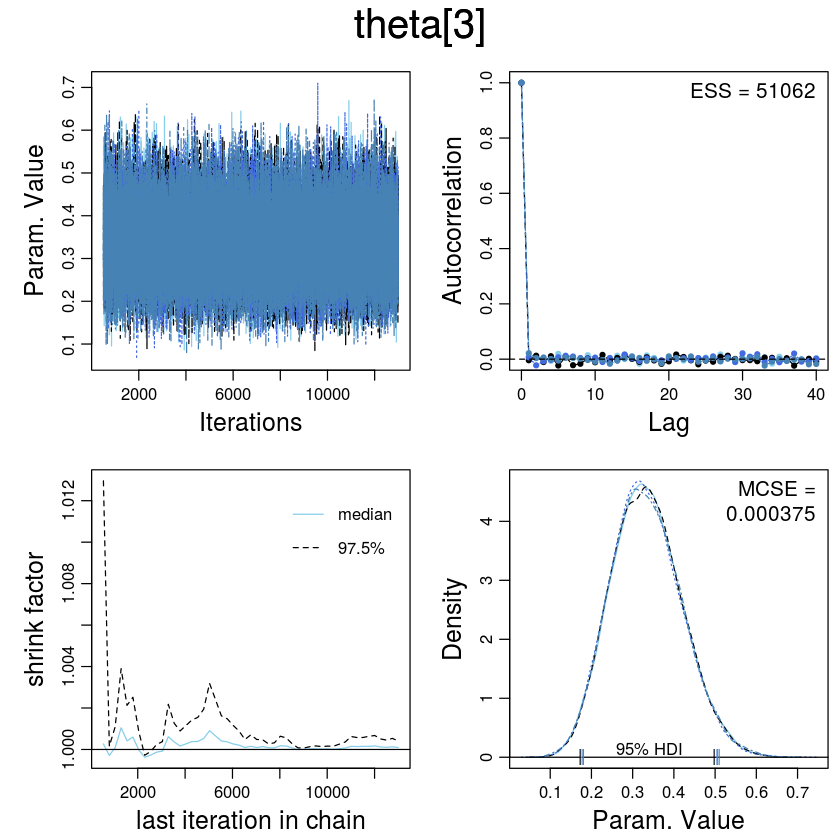

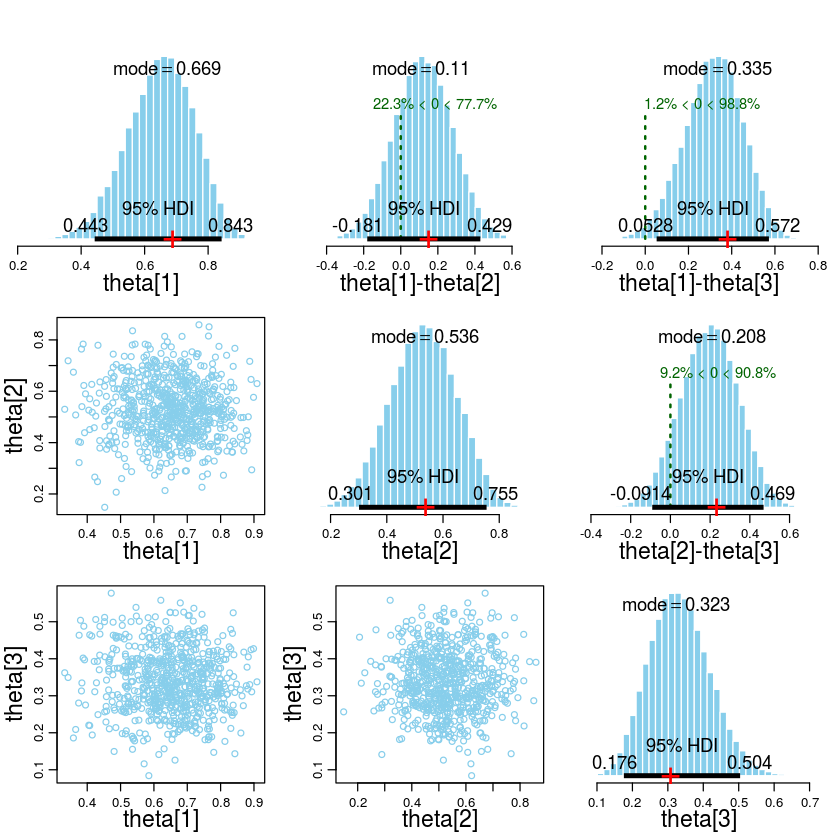

In [6]:
# Load The data 
myData = read.csv("ex_08_01_data.csv")
# N.B.: The functions below expect the data to be a data frame, 
# with one component named y being a vector of integer 0,1 values,
# and one component named s being a factor of subject identifiers.
#------------------------------------------------------------------------------- 
# Load the relevant model into R's working memory:
source("../DBDA2Eprograms/Jags-Ydich-XnomSsubj-MbernBeta.R")
#------------------------------------------------------------------------------- 
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=50000 )
#------------------------------------------------------------------------------- 
# Display diagnostics of chain, for specified parameters:
parameterNames = varnames(mcmcCoda) # get all parameter names
for ( parName in parameterNames ) {
  diagMCMC( codaObject=mcmcCoda , parName=parName  )
}
#------------------------------------------------------------------------------- 
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=NULL , #rope=c(0.45,0.55) ,
                        compValDiff=0.0 , #ropeDiff = c(-0.05,0.05) ,
                      )
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , compVal=NULL , #rope=c(0.45,0.55) ,
          compValDiff=0.0 , #ropeDiff = c(-0.05,0.05) 
        )
#------------------------------------------------------------------------------- 

Given the data, the results are pretty reasonable. $\theta_{1}$ is Andrew and should have higher counts of 1's, inflating the theta value. $\theta_{2}$ is David, which should have equal values of 0's and 1's, making the mode to be near 0.5. $\theta_{3}$ is Mike, which should have a high proportion of 0's, deflating the theta value.

The different sample sizes cause some $\theta$ values to be estimated more accurately than others using MCMC. The ones with higher numbers of sample sizes are more accurately represented.